In [52]:
import datetime as dt
import numpy as np
import polars as pl

from factor_momentum import PcaEngine, FACTORS, TMP
from sf_quant.data import load_factors

In [53]:
FACTORS

['USSLOWL_BETA',
 'USSLOWL_DIVYILD',
 'USSLOWL_EARNQLTY',
 'USSLOWL_EARNYILD',
 'USSLOWL_GROWTH',
 'USSLOWL_LEVERAGE',
 'USSLOWL_LIQUIDTY',
 'USSLOWL_MGMTQLTY',
 'USSLOWL_MIDCAP',
 'USSLOWL_PROFIT',
 'USSLOWL_PROSPECT',
 'USSLOWL_RESVOL',
 'USSLOWL_SIZE',
 'USSLOWL_VALUE']

In [61]:
start = dt.date(2001,1,1); end = dt.date(2020,1,1); factor_returns = load_factors(start,end, FACTORS).lazy()
pca_engine = PcaEngine(n_components=5, lookback_window=100)

In [83]:
pc_rolling_returns = pca_engine.fit_transform_rolling_monthly(factor_returns)
pc_rolling_returns

Fitting rolling PCA...


Rolling PCA: 100%|██████████| 227/227 [00:00<00:00, 1128.27it/s]


Transforming rolling PCA...


Rolling PCA: 100%|██████████| 227/227 [00:00<00:00, 1685.09it/s]


date,pc0,pc1,pc2,pc3,pc4,state
date,f64,f64,f64,f64,f64,date
2001-02-01,-1.464667,-1.143598,0.180363,0.551172,1.143439,2001-02-01
2001-02-02,-1.481167,-0.150589,0.239467,0.383877,-0.276733,2001-02-01
2001-02-05,-0.997846,-0.57137,-0.960766,0.96356,0.80466,2001-02-01
2001-02-06,0.441192,-0.101307,-0.564052,-1.315537,-1.572022,2001-02-01
2001-02-07,0.071369,0.954979,-0.923436,1.117135,-1.701075,2001-02-01
…,…,…,…,…,…,…
2019-12-24,-0.116428,-1.345718,0.05031,-0.394584,-0.264584,2019-12-02
2019-12-26,1.138469,0.198301,1.053526,1.42063,0.196853,2019-12-02
2019-12-27,1.530432,0.588633,-0.567155,0.043286,-0.482651,2019-12-02


In [63]:
pc_expanding_returns = pca_engine.fit_transform_expanding_monthly(start, factor_returns)
pc_expanding_returns

Fitting expanding PCA...


Expanding PCA: 100%|██████████| 227/227 [00:00<00:00, 906.86it/s]


Transforming expanding PCA...


Expanding PCA: 100%|██████████| 227/227 [00:00<00:00, 1829.42it/s]


date,pc0,pc1,pc2,pc3,pc4,state
date,f64,f64,f64,f64,f64,date
2001-02-01,-1.464667,-1.143598,0.180363,0.551172,1.143439,2001-02-01
2001-02-02,-1.481167,-0.150589,0.239467,0.383877,-0.276733,2001-02-01
2001-02-05,-0.997846,-0.57137,-0.960766,0.96356,0.80466,2001-02-01
2001-02-06,0.441192,-0.101307,-0.564052,-1.315537,-1.572022,2001-02-01
2001-02-07,0.071369,0.954979,-0.923436,1.117135,-1.701075,2001-02-01
…,…,…,…,…,…,…
2019-12-24,0.588804,-0.635602,-0.858114,-0.59806,-0.39227,2019-12-02
2019-12-26,0.522944,0.737083,-0.287346,0.147861,-0.343138,2019-12-02
2019-12-27,-0.72225,1.03289,-0.322162,0.494348,-0.125628,2019-12-02


In [93]:
pcs = (pc_rolling_returns.drop('state').unpivot(index='date', variable_name='factor', value_name='ret').lazy()
.with_columns(
    pl.col('date').dt.truncate('1mo').alias('mo'),
)
.group_by(['factor', 'mo']).agg(
    pl.col('date').first().alias('month'),
    (np.log(1 + pl.col('ret')*.01).sum()).alias('ret'),
)
.drop('mo')
.sort(['factor', 'month'])
.with_columns(
    pl.col('ret').shift(1).over('factor').alias('lag_ret')
)
.collect()
)
pcs

factor,month,ret,lag_ret
str,date,f64,f64
"""pc0""",2001-02-01,-0.087645,null
"""pc0""",2001-03-01,-0.010698,-0.087645
"""pc0""",2001-04-02,0.141216,-0.010698
"""pc0""",2001-05-01,-0.02549,0.141216
"""pc0""",2001-06-01,0.03978,-0.02549
…,…,…,…
"""pc4""",2019-08-01,-0.011225,0.021908
"""pc4""",2019-09-03,0.084635,-0.011225
"""pc4""",2019-10-01,-0.014121,0.084635


In [94]:
signal = (pcs.with_columns(
    pl.col('lag_ret').rank('dense').over('month').alias('rank')
)
.with_columns(
    pl.when(pl.col('rank') < 3)
    .then(-1)
    .when(pl.col('rank') > 3)
    .then(1)
    .otherwise(0)
    .alias('signal')
)
)
ports = (signal
.group_by(['month', 'signal']).agg(
    pl.col('ret').sum()
)
.sort('month')
.pivot(on='signal', index='month')
.with_columns(
    (pl.col('1') - pl.col('-1')).alias('ls')
)
)

ports

month,0,1,-1,ls
date,f64,f64,f64,f64
2001-02-01,-0.200769,null,null,null
2001-03-01,0.059192,-0.065376,0.053941,-0.119316
2001-04-02,0.141216,0.180721,-0.023559,0.20428
2001-05-01,-0.015385,-0.056776,-0.076031,0.019255
2001-06-01,0.03978,0.138254,0.041761,0.096493
…,…,…,…,…
2019-08-01,-0.111778,0.105474,-0.010949,0.116422
2019-09-03,-0.006353,-0.021414,0.124942,-0.146357
2019-10-01,-0.018524,0.059257,0.081849,-0.022592


In [95]:
signal.write_parquet(f"PCA_signals_expanding.parquet")

In [96]:
import matplotlib.pyplot as plt

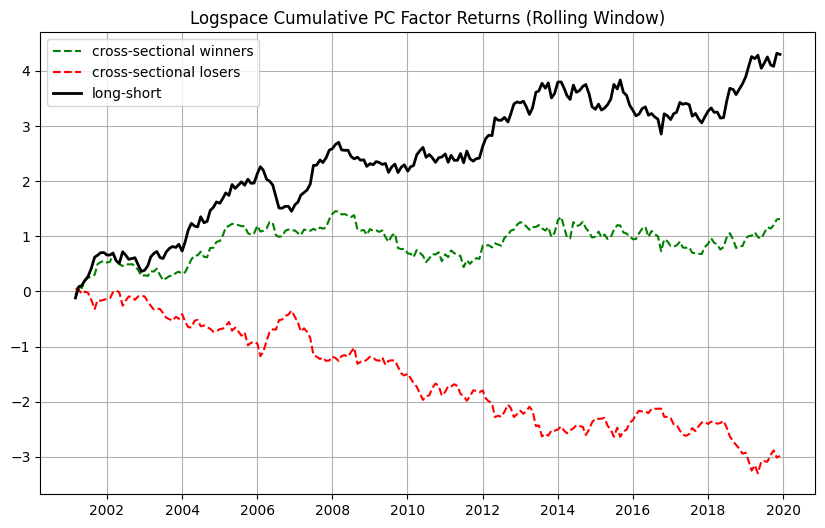

In [97]:
dates = ports['month']

long = ports['1'].cum_sum()
short = ports['-1'].cum_sum()
ls = ports['ls'].cum_sum()

plt.figure(figsize=(10, 6))
plt.title("Logspace Cumulative PC Factor Returns (Rolling Window)")

plt.plot(dates, long, label="cross-sectional winners", c='green', linestyle='--')
plt.plot(dates, short, label="cross-sectional losers", c='red', linestyle='--')
plt.plot(dates, ls, label="long-short", c='black', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()

In [98]:
ret = (ports['ls']).mean() * 12
risk = (ports['ls']).std() * np.sqrt(12)

ret/risk

np.float64(0.5572100401844863)

In [25]:
pc_expanding_returns.describe()

statistic,date,pc0,pc1,pc2,pc3,pc4,state
str,str,f64,f64,f64,f64,f64,str
"""count""","""4758""",4758.0,4758.0,4758.0,4758.0,4758.0,"""4758"""
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""","""2010-07-19 12:29:57.730138""",0.029149,-0.01721,0.002577,0.049018,-0.001631,"""2010-07-05 07:50:37.074401"""
"""std""",null,1.180896,1.173392,1.067127,0.962751,0.939146,null
"""min""","""2001-02-01""",-9.88277,-14.236856,-6.764279,-8.56972,-11.765031,"""2001-02-01"""
"""25%""","""2005-10-26""",-0.58562,-0.632402,-0.584138,-0.480708,-0.53928,"""2005-10-03"""
"""50%""","""2010-07-21""",0.040073,-0.002151,0.004385,0.05309,-0.011649,"""2010-07-01"""
"""75%""","""2015-04-13""",0.660381,0.614892,0.572532,0.581514,0.52912,"""2015-04-01"""
"""max""","""2019-12-31""",14.965047,9.52875,9.127669,7.055314,6.337356,"""2019-12-02"""


In [90]:
pca_engine.states

{datetime.date(2001, 2, 1): {'mean': array([ 0.12733307, -0.03948944, -0.09883074,  0.0205327 , -0.07417944,
          0.02893898,  0.06672679, -0.02076195, -0.11844369,  0.02312224,
          0.03230994,  0.12505647, -0.10286743,  0.07462992]),
  'scale': array([1.72318555, 0.1870822 , 0.24620655, 0.19315863, 0.26074072,
         0.19650499, 0.17384183, 0.14365424, 0.44691672, 0.22344086,
         0.11777463, 0.49524326, 0.30752538, 0.19006111]),
  'components': array([[ 0.1924439 ,  0.26612546,  0.2339507 , -0.17675339,  0.25570102,
          -0.14021402,  0.08934001, -0.06392342,  0.30816687, -0.29822849,
           0.29952571,  0.46472757, -0.39930796, -0.24498123],
         [-0.3398817 , -0.26523482, -0.29874336, -0.35188329, -0.27214021,
          -0.21243288,  0.2598174 ,  0.40037282, -0.23397701, -0.25762098,
           0.2649322 , -0.0116548 , -0.24803319, -0.03332846],
         [ 0.10543454,  0.32384379, -0.27187778, -0.40207526, -0.00718083,
           0.38258278, -0.2725392

In [91]:
dates = list(pca_engine.states.keys())
explained_var = [pca_engine.states[date]["explained_var"] for date in pca_engine.states.keys()]

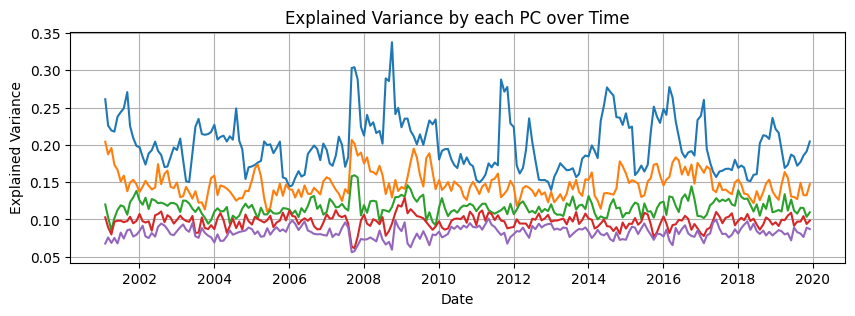

In [92]:
plt.figure(figsize=(10, 3))
plt.plot(dates, explained_var)
plt.title("Explained Variance by each PC over Time")
plt.xlabel("Date")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()